# EDA(Exploratory Data Analysis)


In [2]:
#필요한 패키지를 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (12, 12)

import warnings
warnings.filterwarnings('ignore')

# 0. 데이터 불러오기

In [3]:
## 데이터 불러오기
raw_data = pd.read_csv('data/최종데이터/최종_열삭제전.csv', encoding='utf-8', index_col=0)

raw_data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,...,눈비,강수량,확진자수,SO2,CO,O3,NO2,PM25,적설,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,...,0,0.0,0.0,0.004,0.628,0.025,0.027,54.272,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,...,0,0.0,0.0,0.003,0.544,0.046,0.018,39.076,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,...,0,0.0,0.0,0.003,0.526,0.057,0.018,40.727,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,...,0,0.0,0.0,0.003,0.531,0.066,0.017,42.947,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,...,1,2.2,0.0,0.004,0.539,0.070,0.018,45.211,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226858,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,...,1,29.5,30.0,0.003,0.428,0.034,0.018,21.120,0.0,7
226859,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,...,1,4.5,30.0,0.003,0.420,0.032,0.016,20.040,0.0,11
226860,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,...,0,0.0,30.0,0.003,0.444,0.023,0.018,16.680,0.0,3
226861,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,...,0,0.0,30.0,0.002,0.424,0.017,0.019,14.320,0.0,7


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226863 entries, 0 to 226862
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   광역시도명    226863 non-null  object 
 1   날짜       226863 non-null  object 
 2   요일       226863 non-null  object 
 3   시간대별 시간  226863 non-null  int64  
 4   업종명      226863 non-null  object 
 5   계절       226863 non-null  object 
 6   공휴일      226863 non-null  int64  
 7   기념일      226863 non-null  int64  
 8   기온       226863 non-null  float64
 9   풍속       226863 non-null  float64
 10  습도       226863 non-null  float64
 11  PM10     226863 non-null  float64
 12  운량       226863 non-null  float64
 13  날씨       226863 non-null  int64  
 14  눈비       226863 non-null  int64  
 15  강수량      226863 non-null  float64
 16  확진자수     226863 non-null  float64
 17  SO2      226863 non-null  float64
 18  CO       226863 non-null  float64
 19  O3       226863 non-null  float64
 20  NO2      226863 non-null  

# 1. 데이터 확인


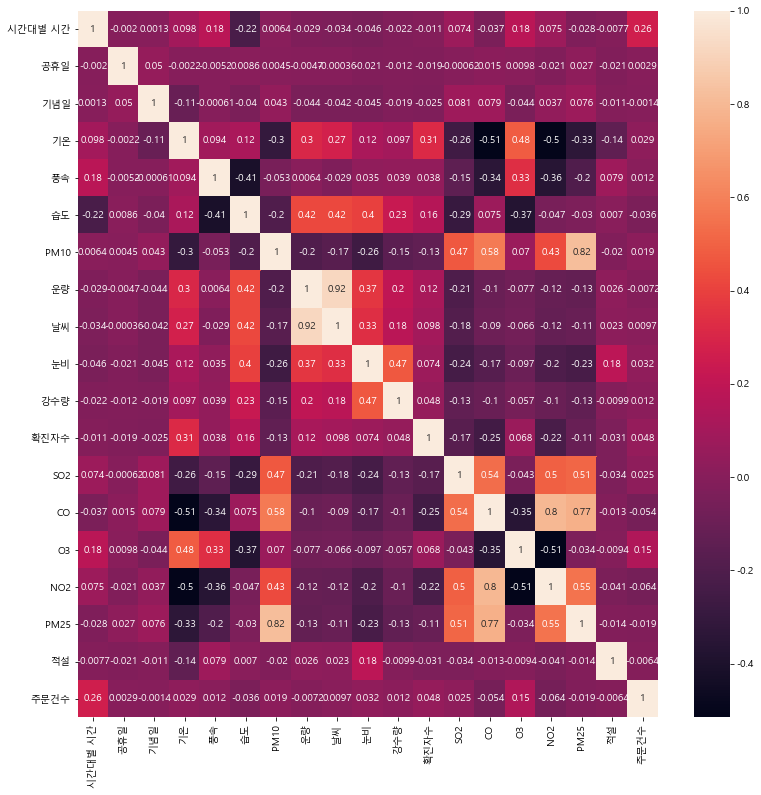

In [5]:
plt.figure(figsize=(13, 13))
sns.heatmap(raw_data.corr(), annot=True)

### 1-1) SO2(이산화 황), CO(일산화탄소), O3(오존), NO2(이산화질소), PM25(초미세먼지)
* 위의 변수(대기 데이터)들은 배달에 많은 영향을 주지 않는다고 판단하였고, 또한 PM10으로 충분히 설명 가능하다고 판단하여 삭제

### 1-2) 적설
* 눈이 안온 날이 훨씬 많고, 강수량 컬럼과 합쳐 눈비 컬럼으로 파생변수 생성하였으므로, 삭제

In [6]:
final_data = raw_data.drop(['SO2', 'CO', 'O3', 'NO2', 'PM25', '적설'], axis=1)

### 1-3) 심부름
* 데이터 담당자에게 문의 결과 음식과 무관한 자동차 부품, 핸드폰과 같은 배달 주문이므로 제외

In [7]:
delete_index = final_data.loc[final_data['업종명']=='심부름'].index
final_data = final_data.drop(delete_index, axis=0)

final_data.reset_index(drop=True, inplace=True)

final_data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,습도,PM10,운량,날씨,눈비,강수량,확진자수,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,91.2,79.512,6.4,3,0,0.0,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,71.6,58.013,9.2,4,0,0.0,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,71.4,57.240,9.8,4,0,0.0,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,69.8,60.360,9.8,4,0,0.0,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,72.6,64.595,10.0,4,1,2.2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221205,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,90.0,31.320,10.0,4,1,29.5,30.0,7
221206,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,91.0,27.520,5.0,2,1,4.5,30.0,11
221207,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,91.0,22.720,7.0,3,0,0.0,30.0,3
221208,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,92.0,19.600,6.0,3,0,0.0,30.0,7


# 2. 데이터 탐색

## 2.1 전체 데이터

### 전체 주문건수, 기온, 미세먼지, 코로나 그래프

In [8]:
final_data['날짜'] = pd.to_datetime(final_data['날짜'])

In [9]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221210 entries, 0 to 221209
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   광역시도명    221210 non-null  object        
 1   날짜       221210 non-null  datetime64[ns]
 2   요일       221210 non-null  object        
 3   시간대별 시간  221210 non-null  int64         
 4   업종명      221210 non-null  object        
 5   계절       221210 non-null  object        
 6   공휴일      221210 non-null  int64         
 7   기념일      221210 non-null  int64         
 8   기온       221210 non-null  float64       
 9   풍속       221210 non-null  float64       
 10  습도       221210 non-null  float64       
 11  PM10     221210 non-null  float64       
 12  운량       221210 non-null  float64       
 13  날씨       221210 non-null  int64         
 14  눈비       221210 non-null  int64         
 15  강수량      221210 non-null  float64       
 16  확진자수     221210 non-null  float64       
 17  주문건수     2

In [10]:
# yaar, month 열 생성
final_data['year'] = final_data['날짜'].dt.year
final_data['month'] = final_data['날짜'].dt.month

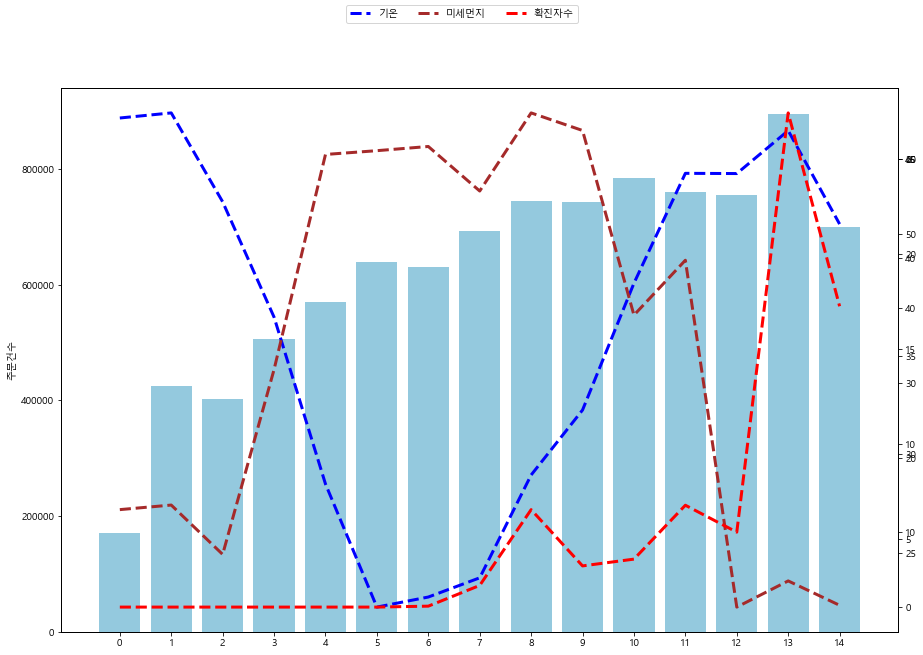

In [11]:
fig, axes = plt.subplots(figsize=(15, 10))

temp = final_data.groupby(['year','month']).agg({'주문건수':'sum','기온':'mean','PM10':'mean','확진자수':'mean'}).reset_index()
index = temp.index 

sns.barplot(x=temp.index, y=temp['주문건수'], ax=axes, color='skyblue')

ax2 = axes.twinx()
ax2.plot(np.arange(len(index)), temp['기온'], color="b", linestyle='--',  linewidth=3, label='기온')

ax3 = axes.twinx()
ax3.plot(np.arange(len(index)), temp['PM10'], color="brown", linestyle='--',  linewidth=3,label='미세먼지')

ax4 = axes.twinx()
ax4.plot(np.arange(len(index)), temp['확진자수'], color="r", linestyle='--',  linewidth=3,label='확진자수')

fig.legend(loc='upper center', ncol=4)
plt.show()

### 업종별 주문건수, 기온, 미세먼지, 코로나 그래프

15it [00:02,  7.27it/s]


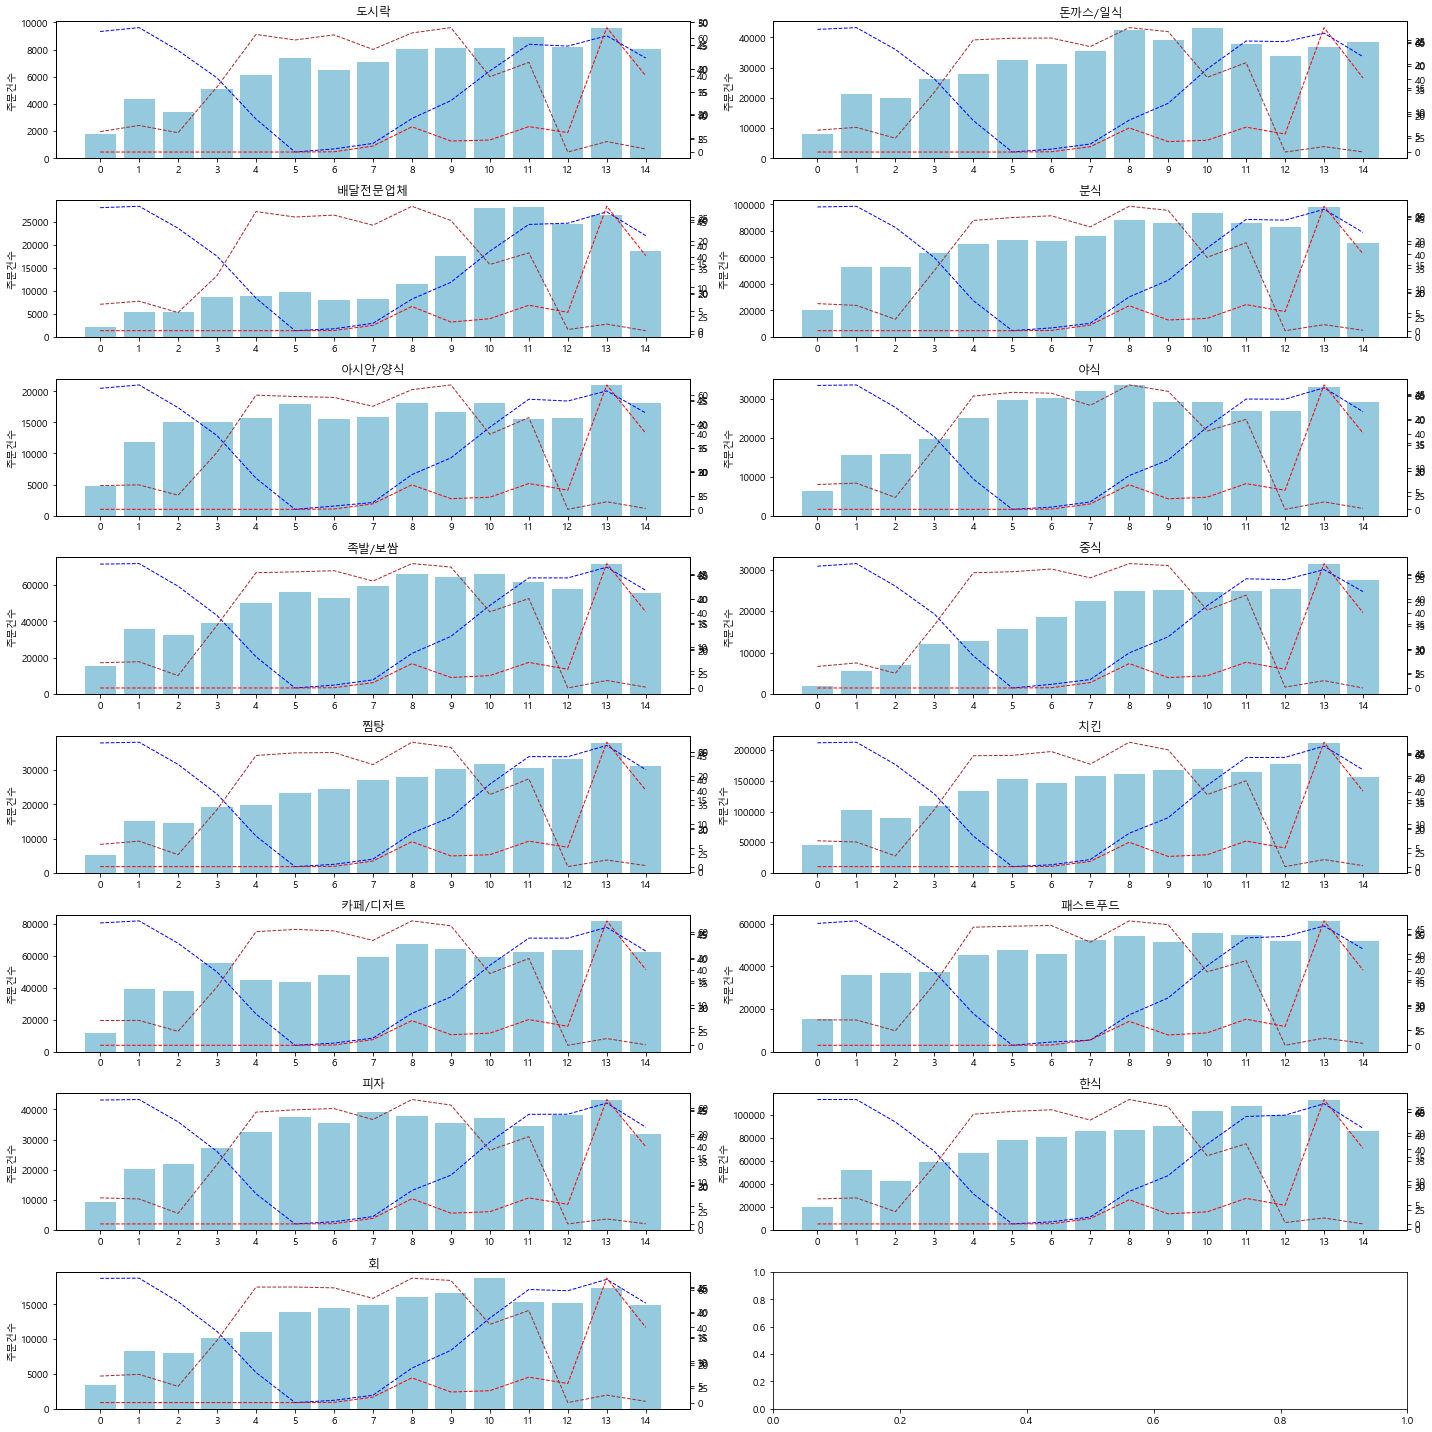

In [12]:
import time
from tqdm import tqdm

fig, axes = plt.subplots(8, 2, figsize=(20, 20))
ax = axes.ravel()

columns = np.unique(final_data['업종명'])
temp = final_data.groupby(['year','month','업종명']).agg({'주문건수':'sum','기온':'mean','PM10':'mean','확진자수':'mean'}).reset_index()

for i, column in tqdm(enumerate(columns)):
    ax[i].set_title(columns[i])
    tt = temp.loc[temp['업종명']==column].reset_index()
    sns.barplot(x=tt.index, y=tt['주문건수'], ax=ax[i], color='skyblue')

    ax2 = ax[i].twinx()
    ax2.plot(np.arange(len(tt.index)), tt['기온'], color="b", linestyle='--',  linewidth=1, label='기온')

    ax3 = ax[i].twinx()
    ax3.plot(np.arange(len(tt.index)), tt['PM10'], color="brown", linestyle='--',  linewidth=1,label='미세먼지')

    ax4 = ax[i].twinx()
    ax4.plot(np.arange(len(tt.index)), tt['확진자수'], color="r", linestyle='--',  linewidth=1,label='확진자수')

plt.tight_layout()        

### 업종별 주문건수 막대 그래프

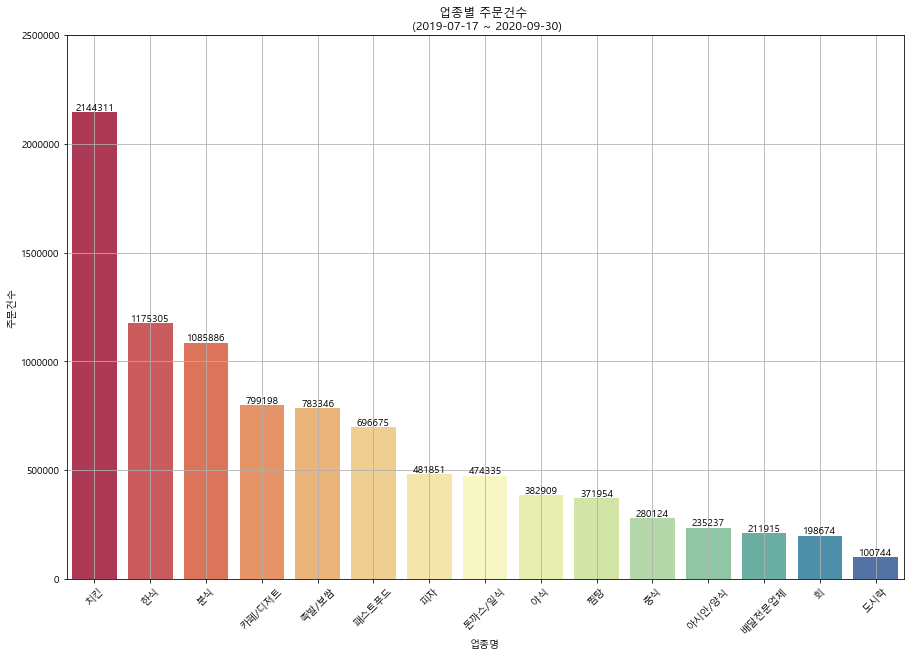

In [13]:
# 날짜 형변환
final_data['날짜'] = pd.to_datetime(final_data['날짜'])

tmp = final_data.groupby(['업종명']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False)

fig, ax = plt.subplots(figsize=(15, 10))

plt.title('업종별 주문건수 \n (2019-07-17 ~ 2020-09-30)')
sns.barplot(data=tmp, x=tmp.index, y='주문건수', palette='Spectral', ax=ax)

x = np.arange(len(tmp.index))
y = tmp['주문건수']

for j, v in enumerate(x):
        plt.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')
        
        
ax.ticklabel_format(style='plain', axis='y')
plt.yticks(np.arange(0, 3000000, 500000))
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 업종별 주문건수 히스토그램

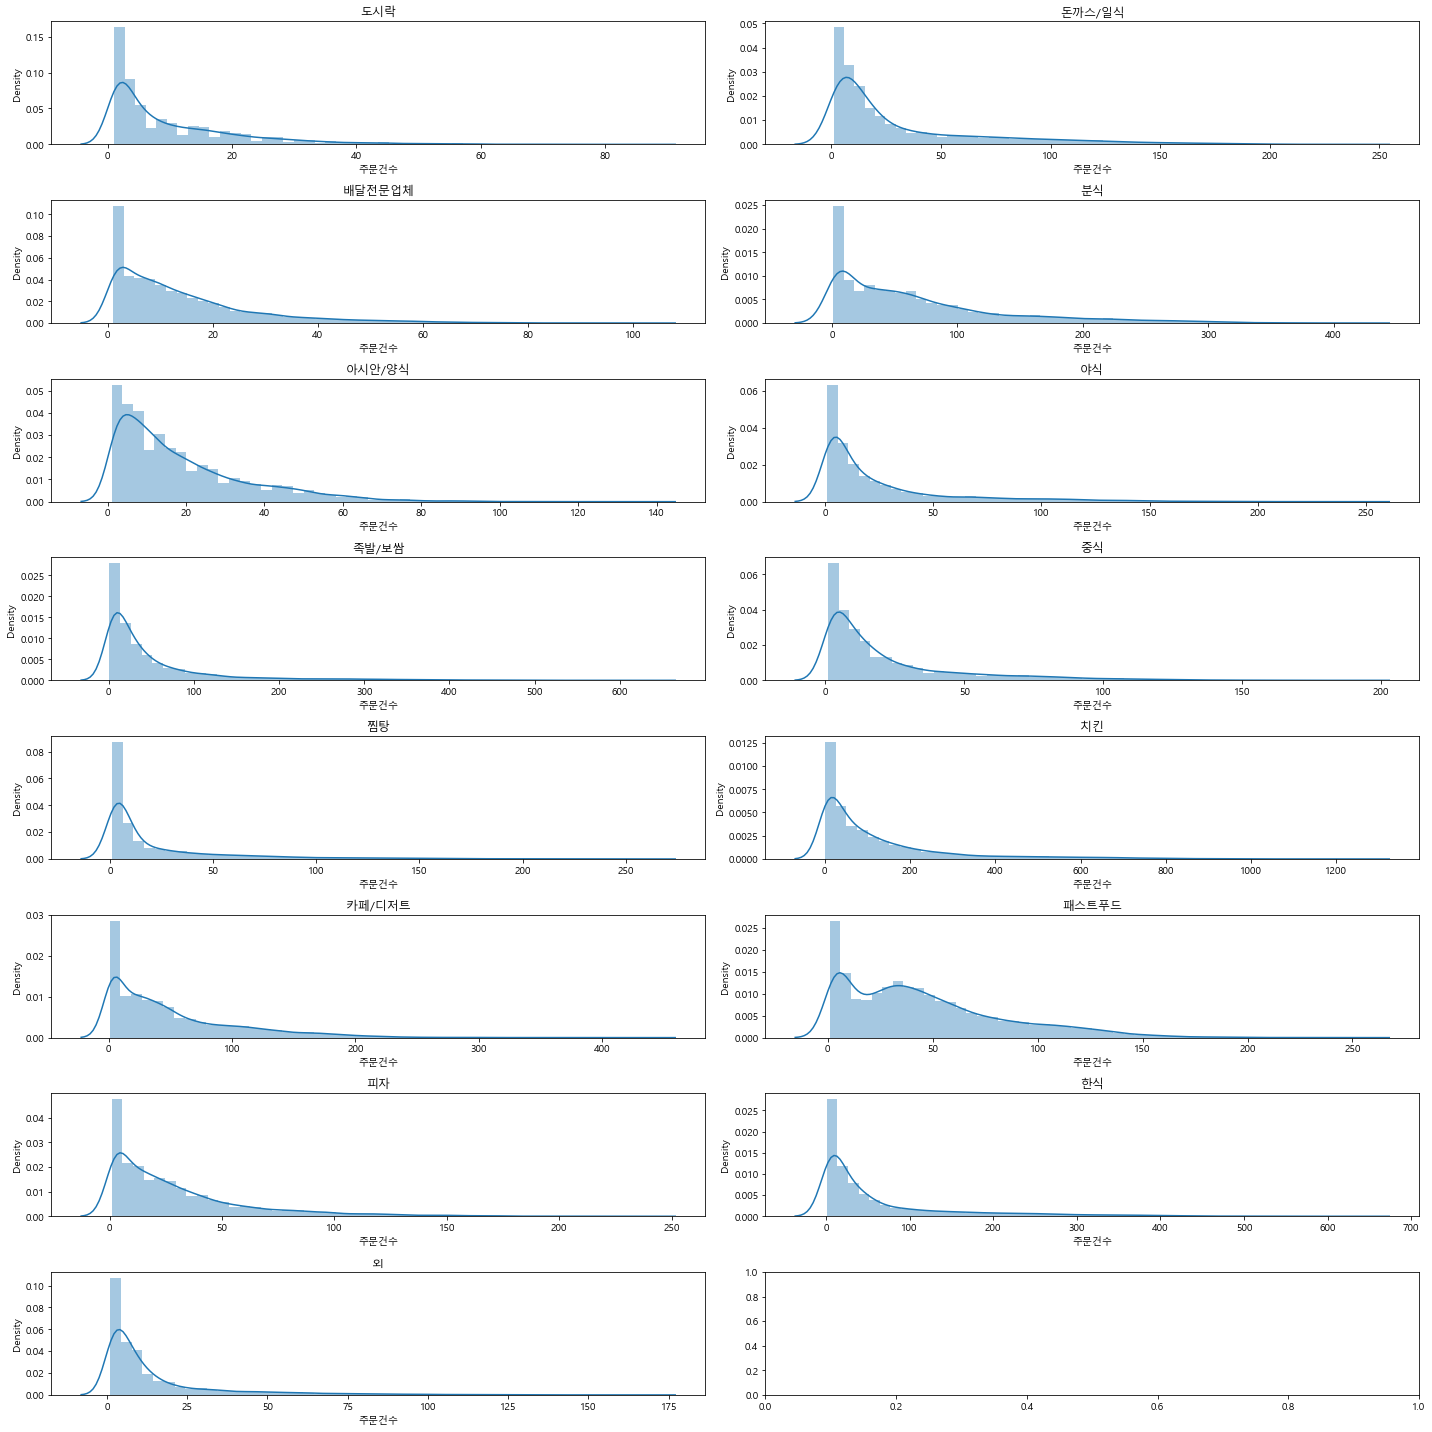

In [14]:
columns = np.unique(final_data['업종명'])

fig, axes = plt.subplots(8, 2, figsize=(20, 20))

ax = axes.ravel()

for i, column in enumerate(columns):
    ax[i].set_title(columns[i])
    sns.distplot(
        final_data.loc[(final_data['업종명']==columns[i])]['주문건수'], ax=ax[i])
    plt.tight_layout()

##### Log

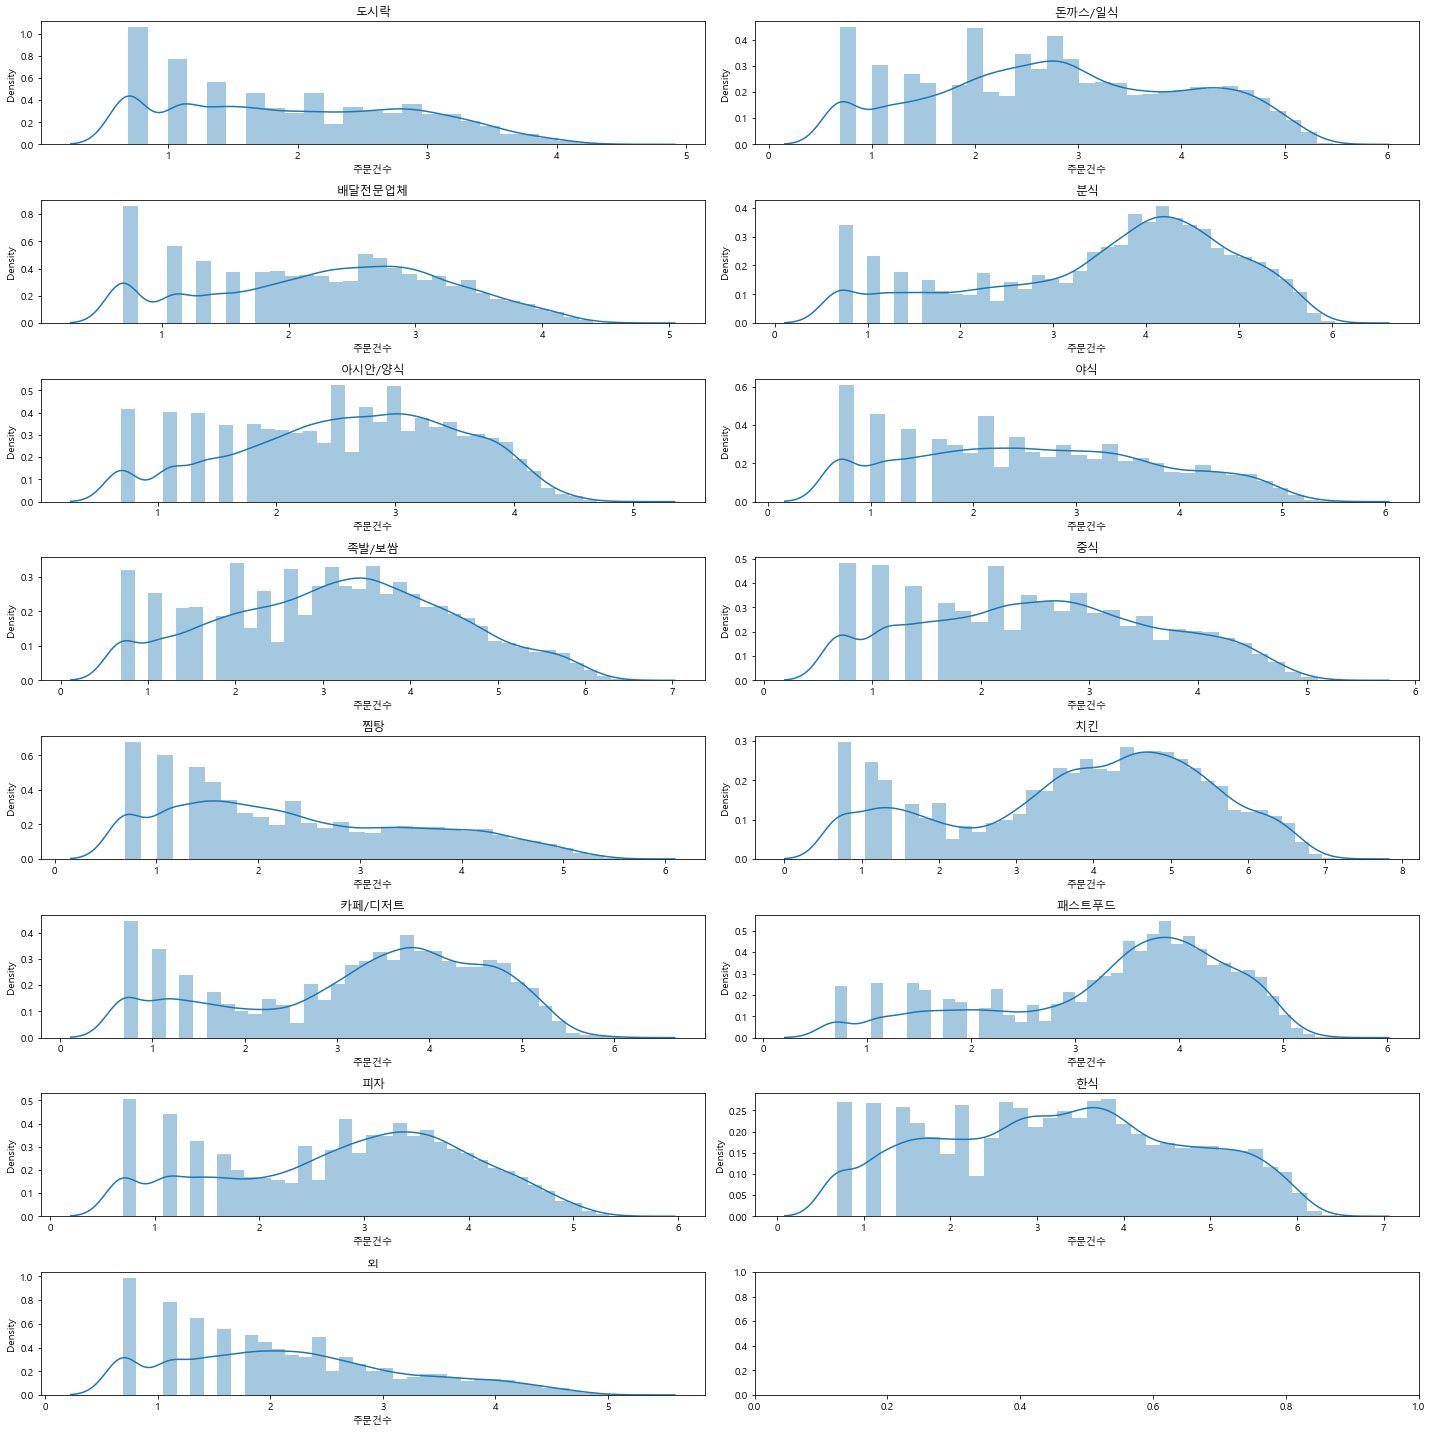

In [15]:
columns = np.unique(final_data['업종명'])

fig, axes = plt.subplots(8, 2, figsize=(20, 20))

ax = axes.ravel()

for i, column in enumerate(columns):
    ax[i].set_title(columns[i])
    sns.distplot(np.log1p(final_data.loc[(final_data['업종명']==columns[i])]['주문건수']), ax=ax[i])
    plt.tight_layout()

### 업종별 주문건수(Log) KDE 플롯

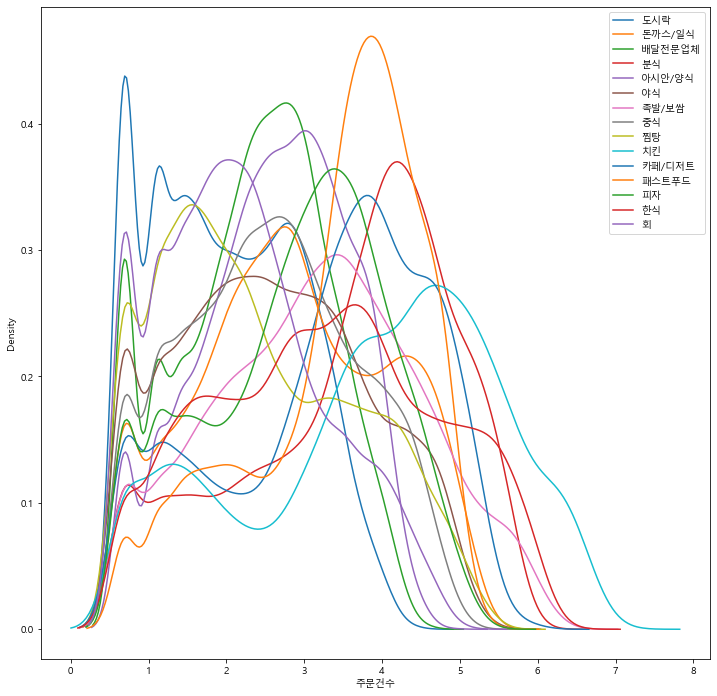

In [16]:
for i, column in enumerate(columns):
    sns.kdeplot(np.log1p(final_data.loc[(final_data['업종명']==columns[i])]['주문건수']), shade=False, label=columns[i])
    
plt.legend()

### 업종별 주문건수 바이올린 플롯

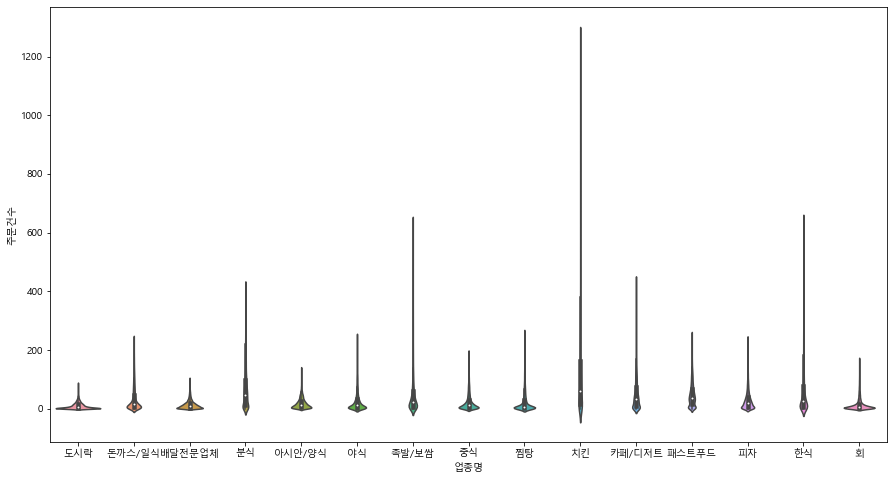

In [17]:
plt.figure(figsize=(15,8))
sns.violinplot(x='업종명', y='주문건수', data=final_data)

### 시간대별 전체 주문건수

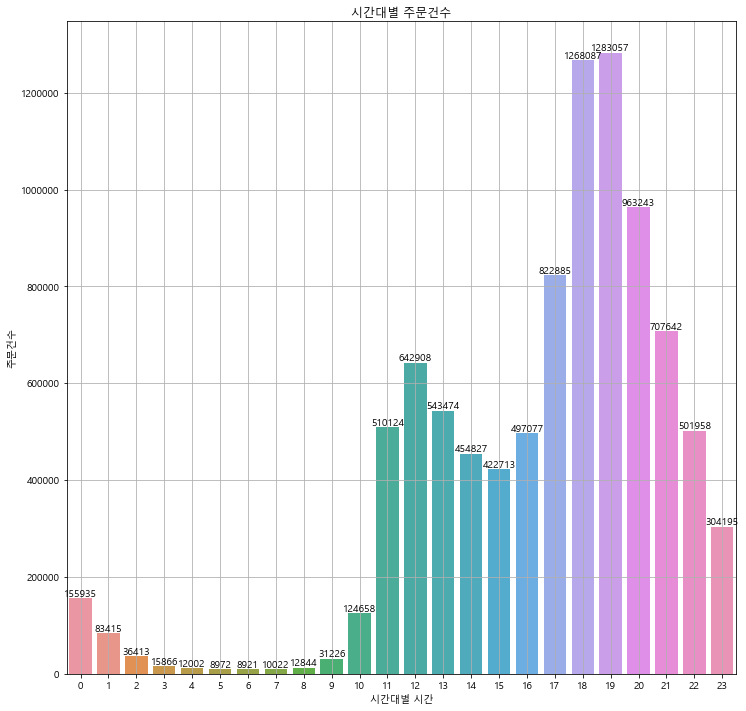

In [18]:
temp = final_data.groupby('시간대별 시간').agg({'주문건수':'sum'}).reset_index()
sns.barplot(x='시간대별 시간', y='주문건수', data=temp)

plt.title('시간대별 주문건수')
plt.grid()
x = np.arange(len(temp.index))
y = temp['주문건수']
for j, v in enumerate(x):
        plt.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')

## 2.2 연도별 비교

### 업종별 주문건수 막대 그래프

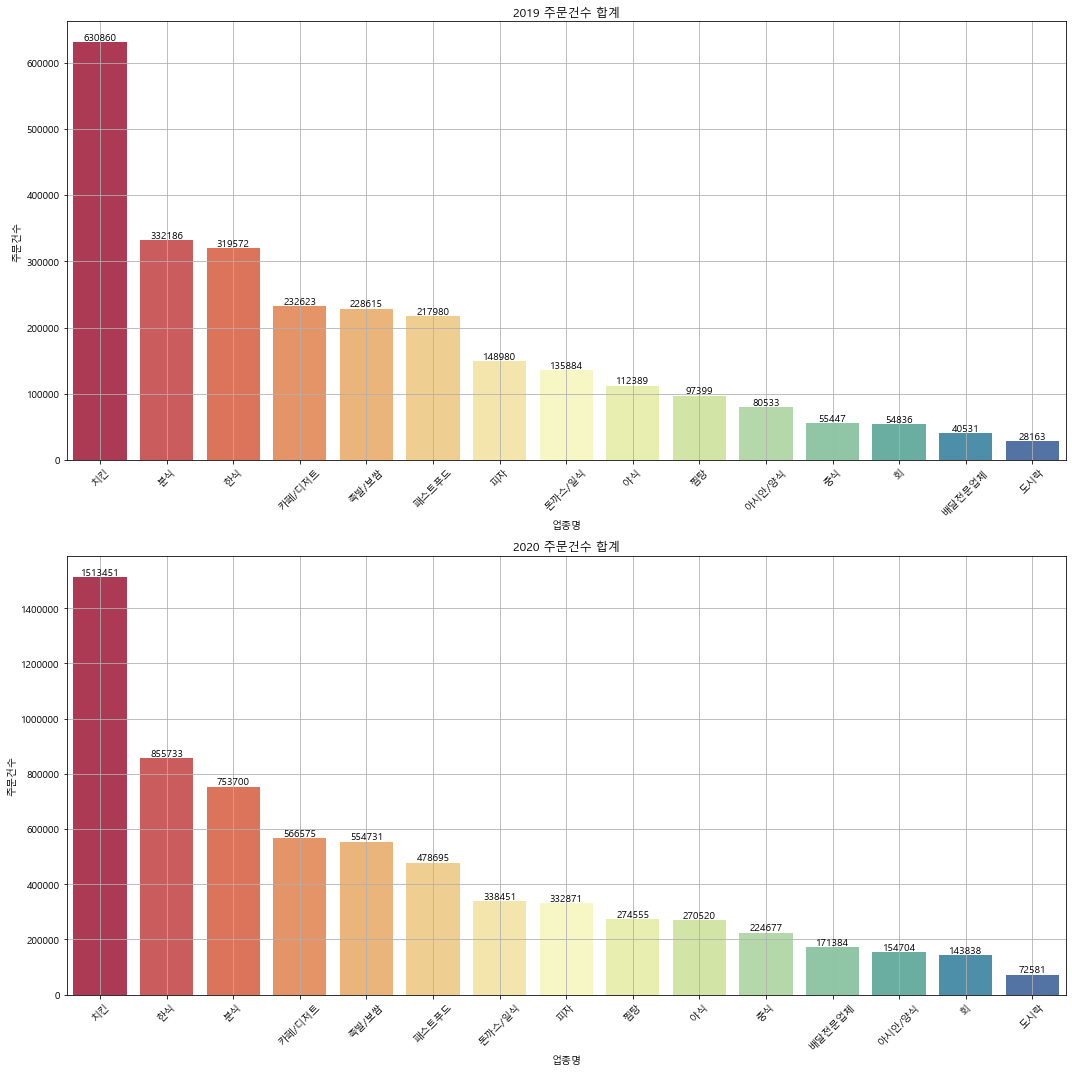

In [19]:
year = [2019, 2020]
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

for ax, yr in zip(axes.ravel(),year):
    temp = final_data.loc[final_data['날짜'].dt.year == yr].groupby(['업종명']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False)
    index = temp.index
    sns.barplot(x=index, y=temp['주문건수'],data=temp, palette='Spectral', ax=ax)

    
    x = np.arange(len(temp.index))
    y = temp['주문건수']

    for j, v in enumerate(x):
        ax.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')
        
        ax.ticklabel_format(style='plain', axis='y')
        ax.set_xticklabels(temp.index, rotation=45)
        ax.set_title(str(yr)+' '+'주문건수 합계')
        ax.grid()
plt.tight_layout()

### 전 업종 시간대별 주문건수비교 막대 그래프

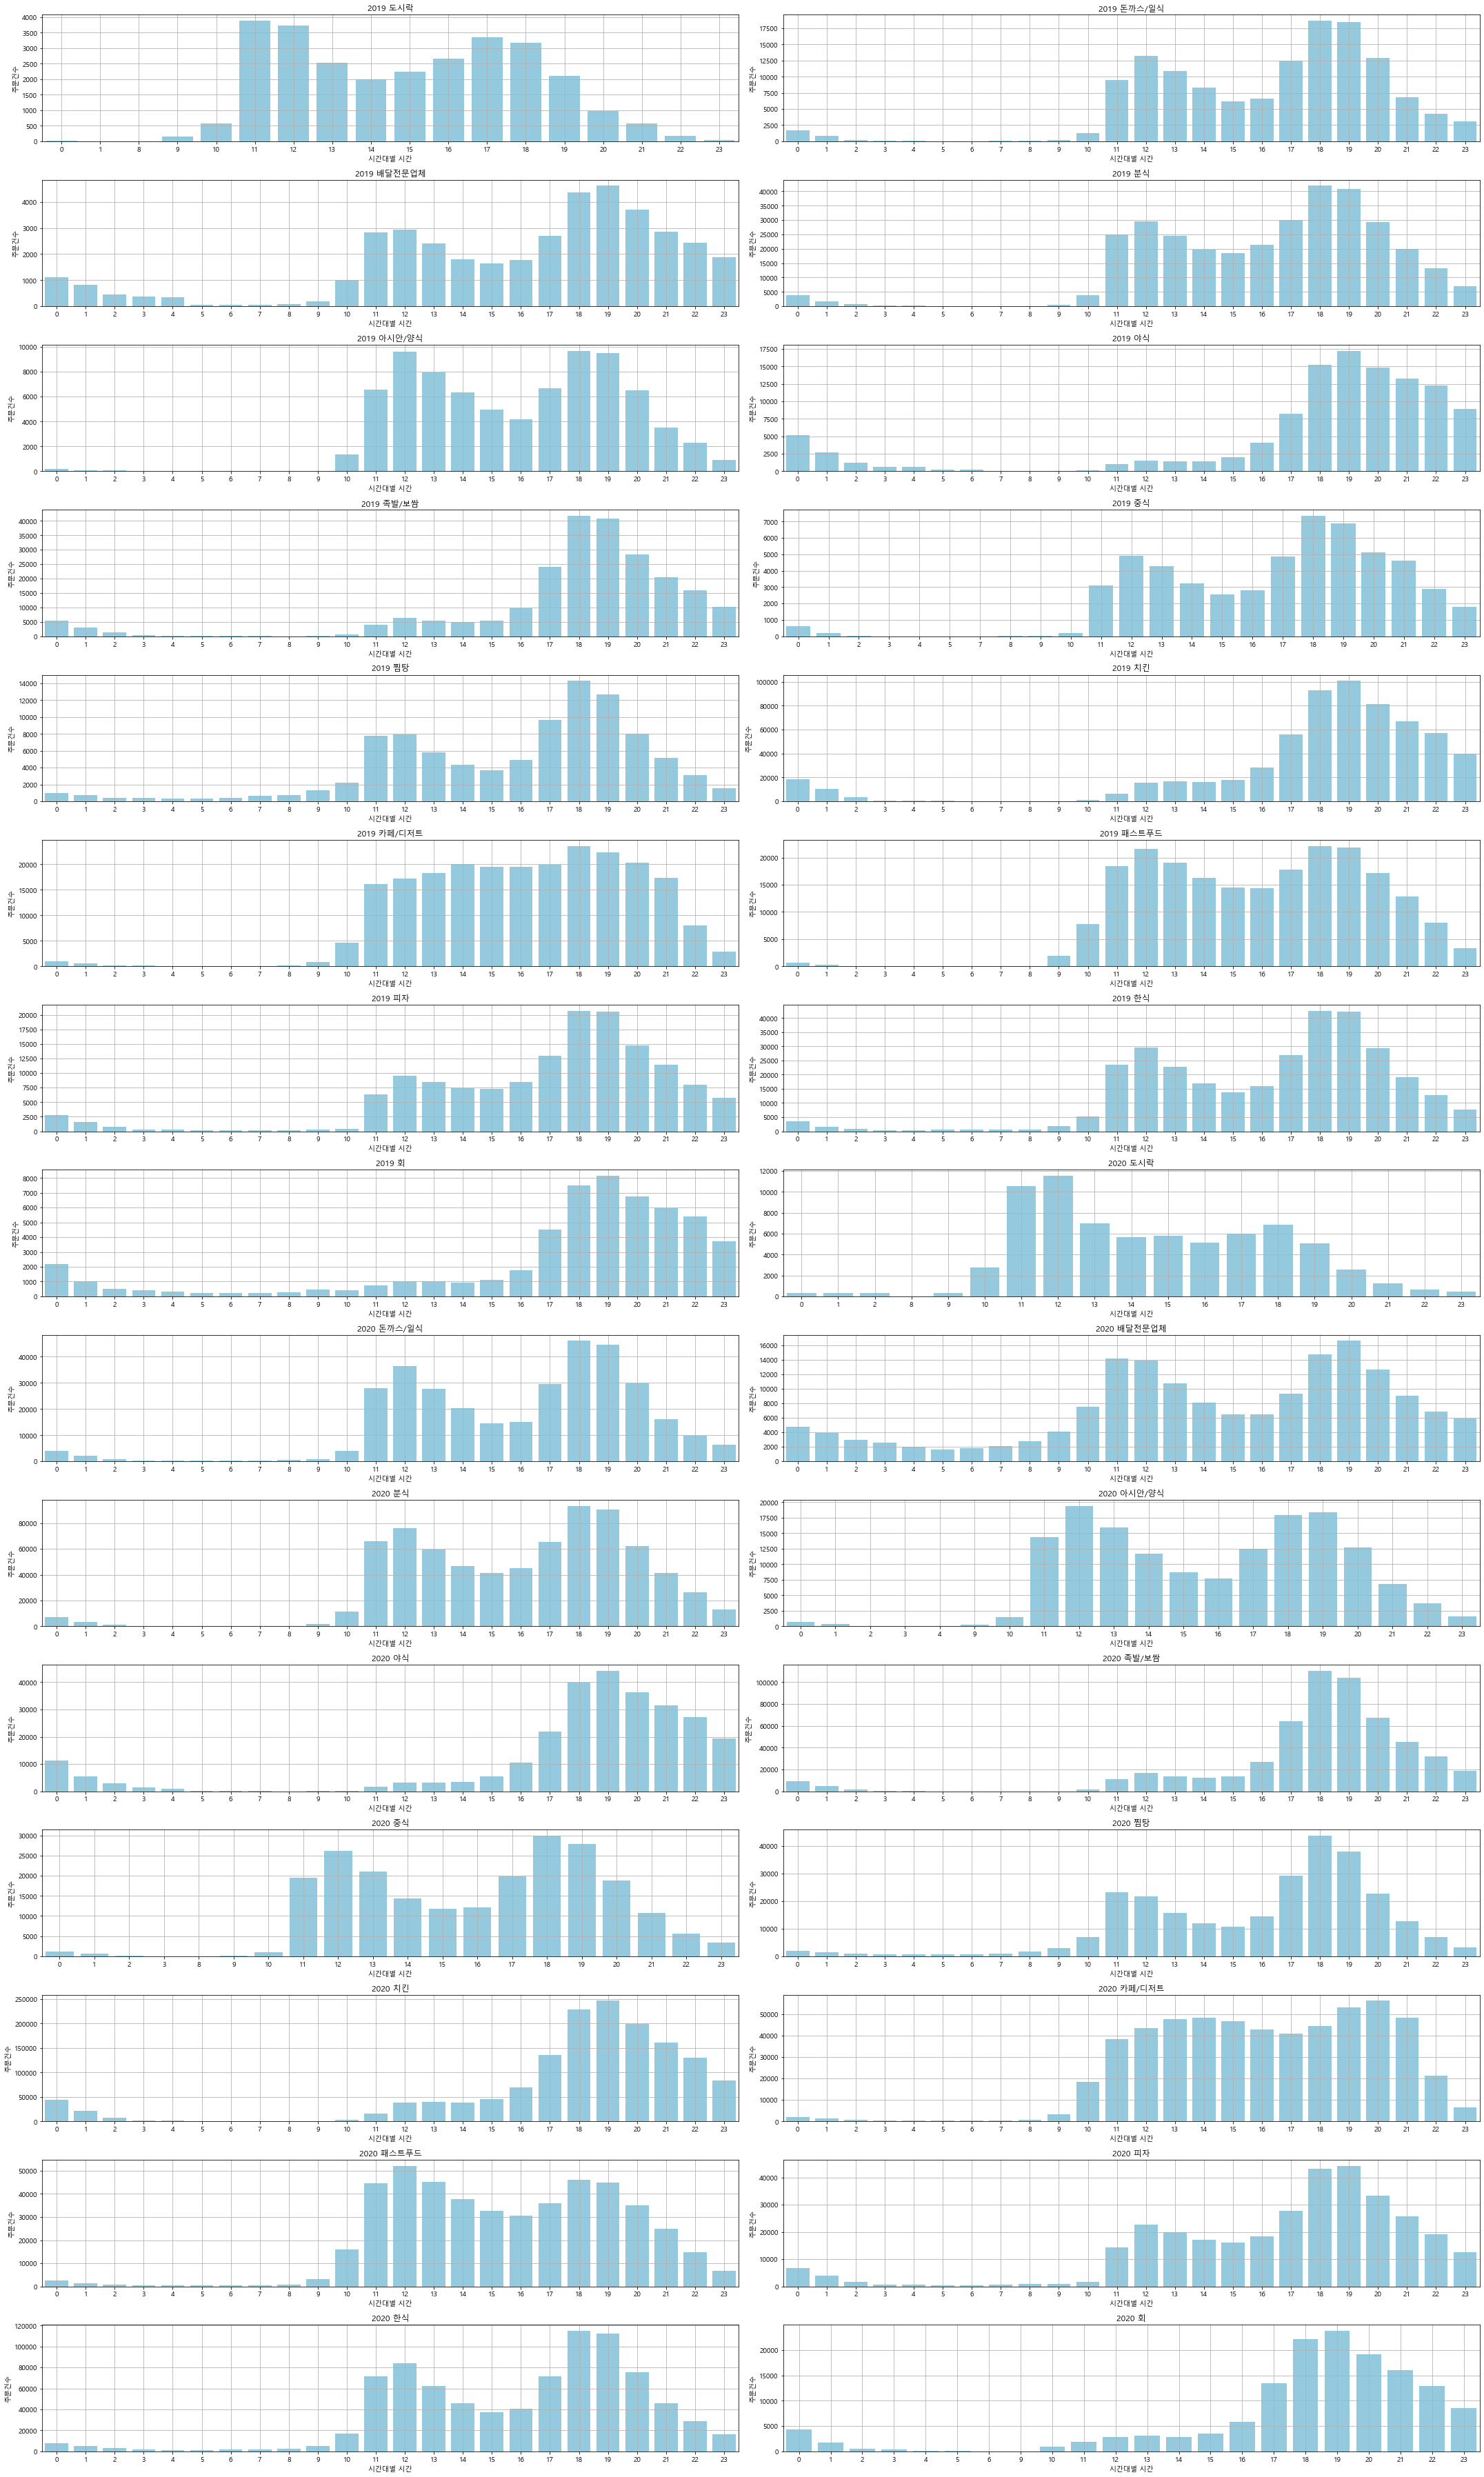

In [47]:
year = [2019,2020]
columns = np.unique(final_data['업종명'])
fig, axes = plt.subplots(15, 2, figsize=(30, 50))
ax = axes.ravel()
i=0
for yr in year:
    # 각 연도별 주문건수 합계 테이블 저장
    temp = final_data.loc[final_data['날짜'].dt.year == yr].groupby(['업종명', '시간대별 시간']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False).reset_index()
    # 각 업종별 시간대별 시간 - 주문건수 그래프 출력
    for column in columns:
        ax[i].set_title(str(yr) +" "+ column)
        tt = temp.loc[temp['업종명'] == column][['시간대별 시간', '주문건수']]
        sns.barplot(data=tt, x='시간대별 시간', y='주문건수', color='skyblue', ax=ax[i])
        ax[i].grid()
        i +=1
        
plt.tight_layout()

## 3.1 지역별 비교

### 지역 비교를 위한 사용자 함수 정의

In [22]:
### 사용자 함수 정의

def bar_plotting(df=None, X=None, aggfunc=sum, figsize=(12, 10)):
    
    area = ['서울', '경기도']
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for i, ax in enumerate(axes.ravel()):
        
        tmd_df = df.loc[df['광역시도명']==area[i]]
        
        if X == '계절':
            data = np.round(tmd_df.groupby(X).agg({'주문건수':aggfunc}).reindex(['봄', '여름', '가을', '겨울']), 3)
        elif X== '업종명':
            data = tmd_df.groupby(X).agg({'주문건수':aggfunc}).sort_values(by='주문건수', ascending=False)
        else:
            data = np.round(tmd_df.groupby(X).agg({'주문건수':aggfunc}), 3)
            
        sns.barplot(x=data.index, y=data['주문건수'], data=data, palette='deep', ax=ax)
        
        x = np.arange(len(data.index))
        y = data['주문건수']

        for j, v in enumerate(x):
            ax.text(v, y[j]+0.2, y[j],
                   fontsize=10, color='black', 
                   horizontalalignment='center',
                   verticalalignment='bottom')
            ax.ticklabel_format(style='plain', axis='y')
            ax.set_title(area[i]+ ' '+ X +' barplot')
            ax.set_xticklabels(data.index, rotation=45)
            
        ax.grid()
        plt.tight_layout()

### 2-1) 서울/경기 업종별 전체 주문건수

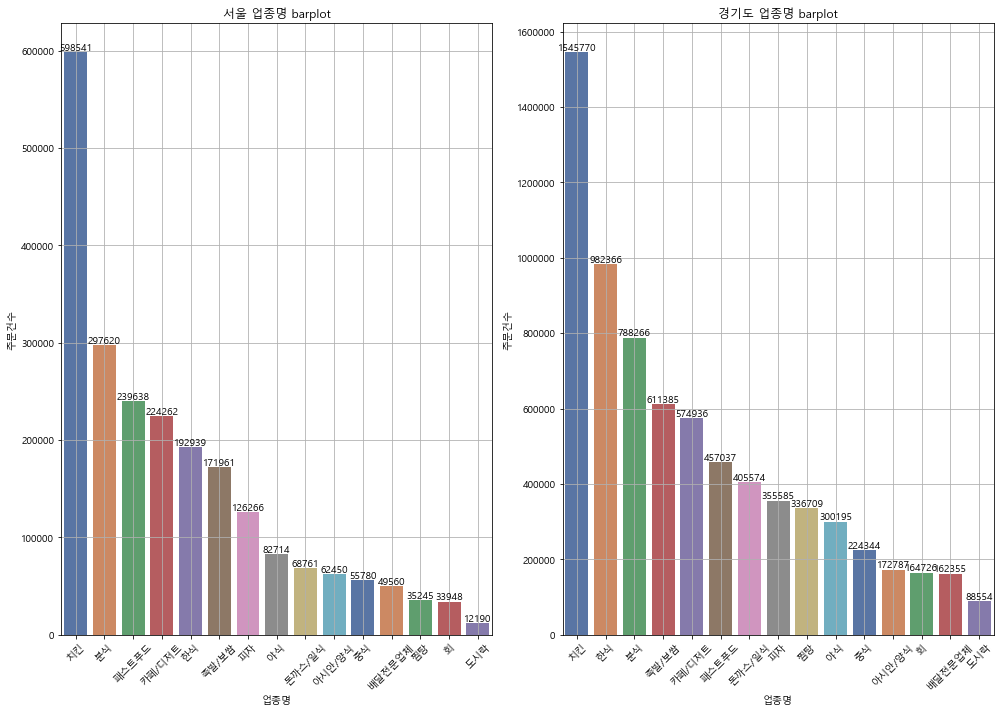

In [23]:
bar_plotting(df=final_data, X='업종명', aggfunc=sum, figsize=(14, 10))

###  2-2) 서울/경기 시간대별 전체 주문건수

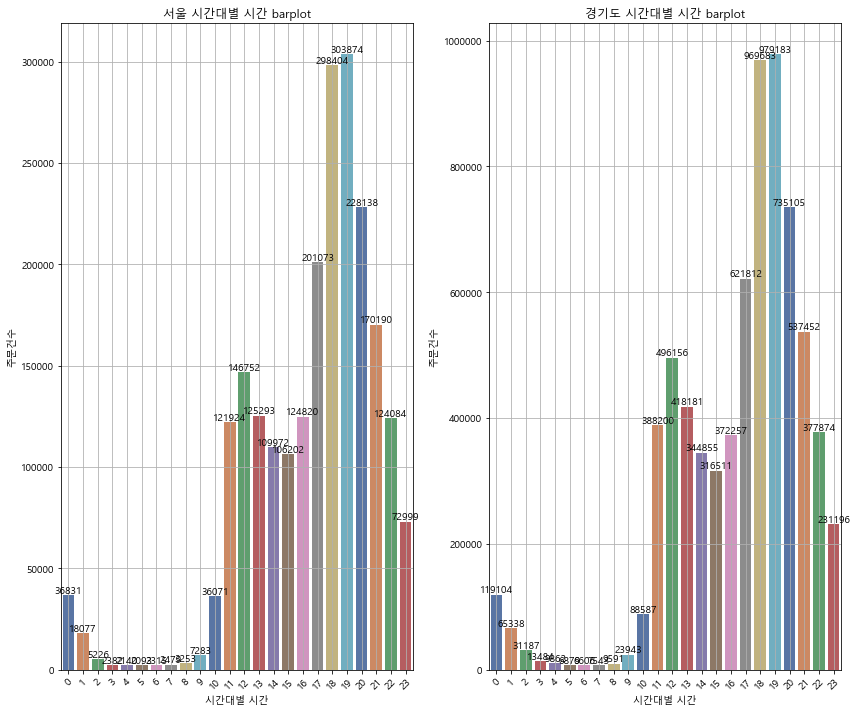

In [24]:
bar_plotting(df=final_data, X='시간대별 시간', aggfunc=sum)

###  2-3) 서울/경기 계절별 주문 건수

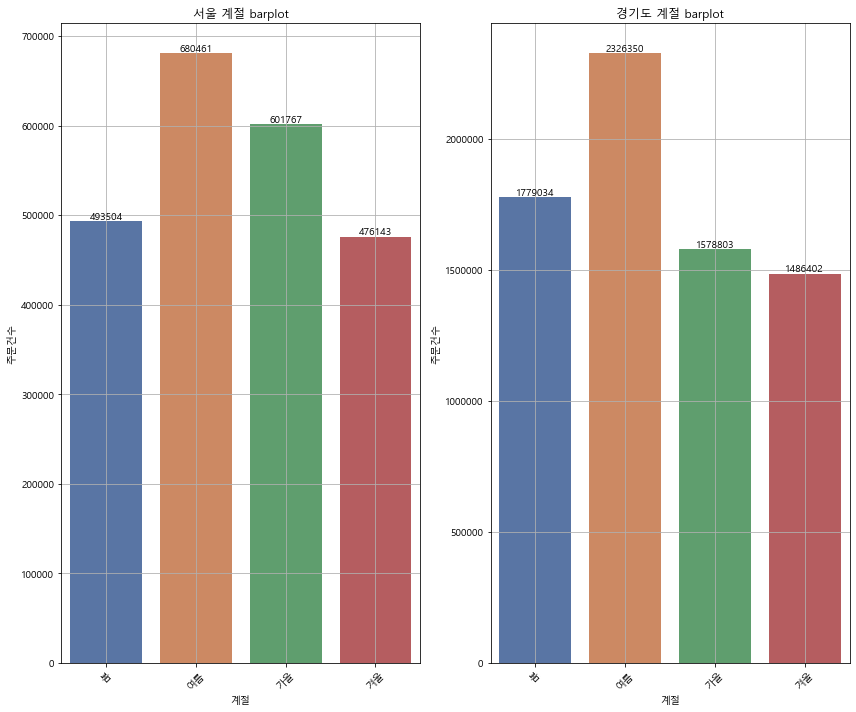

In [25]:
bar_plotting(df=final_data, X='계절', aggfunc=sum)

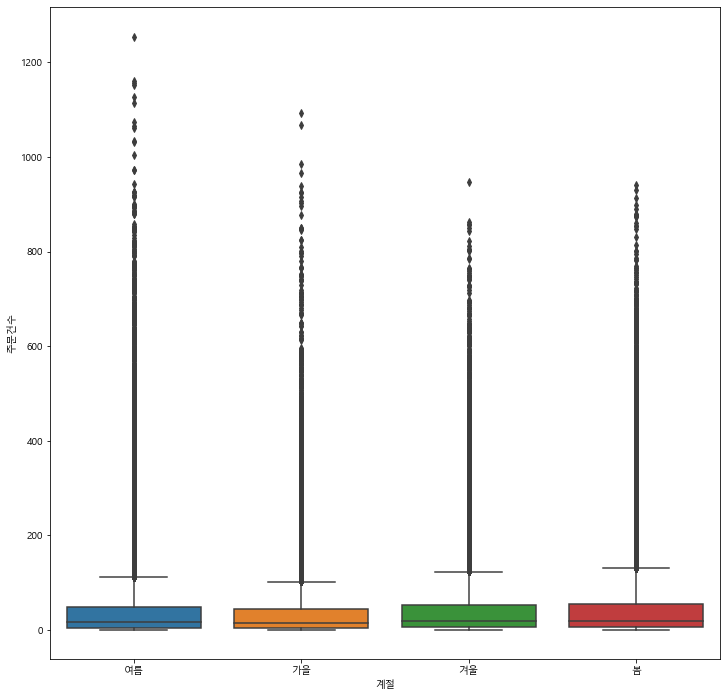

In [26]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

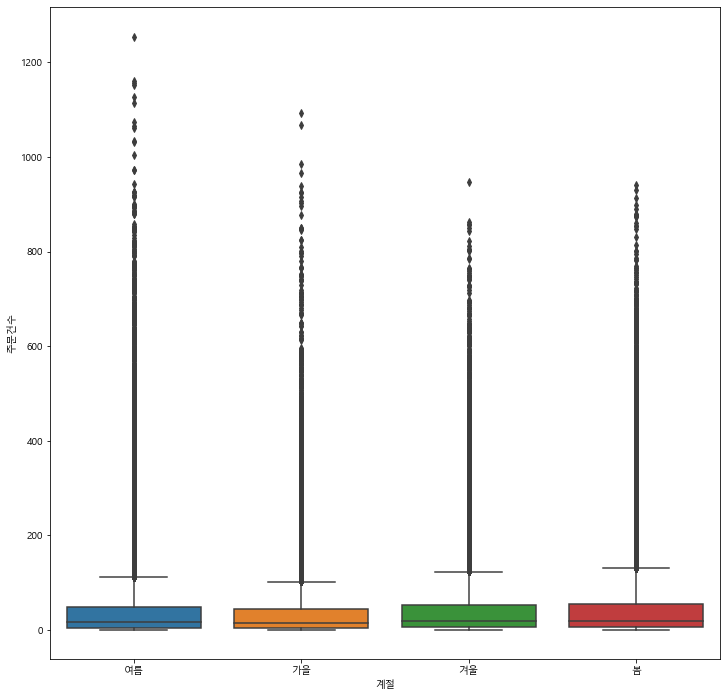

In [27]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

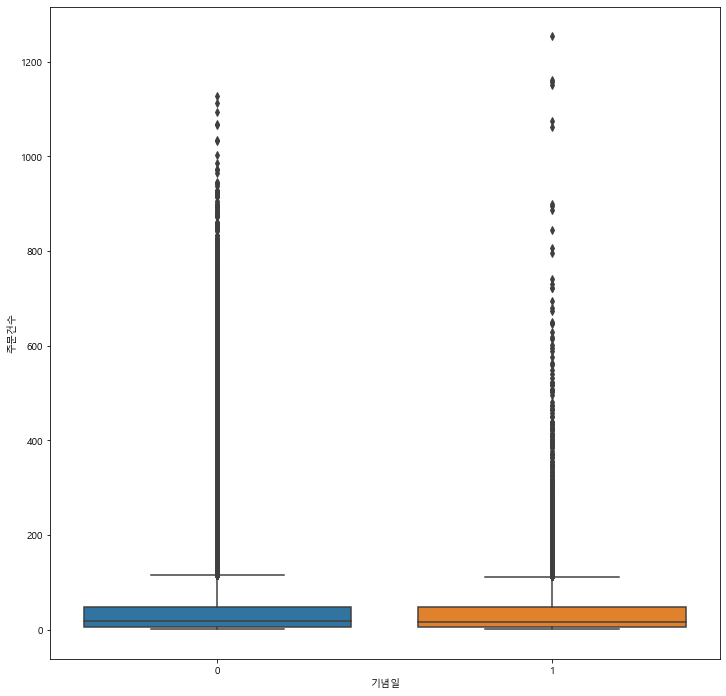

In [28]:
sns.boxplot(x='기념일', y='주문건수', data=final_data)

In [29]:
pd.get_dummies(final_data[['요일', '시간대별 시간', '계절', '공휴일', '기념일', '날씨', '눈비']])

dummy_dict = {'요일': 'day', '시간대별 시간': 'time', '계절': 'season', '공휴일' : 'holiday', '기념일' : 'holiday2', '날씨' : 'climate', '눈비': 'rain_snow'}

def get_all_dummies(data=None, dummy_dict=None):
    df = pd.DataFrame()
    
    for dummy in list(dummy_dict.keys()):
        
        tmp_df = pd.get_dummies(data[dummy], prefix=dummy_dict[dummy])
        
        df = pd.concat([df, tmp_df], axis=1)
        
    return df
        

In [30]:
dummies = get_all_dummies(final_data, dummy_dict)

In [31]:
temp = pd.concat([final_data, dummies], axis=1)

temp.drop(list(dummy_dict.keys()), axis=1, inplace=True)

In [32]:
chicken = temp.loc[temp['업종명']=='배달전문업체']

chicken_sl = chicken.loc[chicken['광역시도명']=='서울']
chicken_gg = chicken.loc[chicken['광역시도명']=='경기도']

In [33]:
chicken_sl_fin = chicken_sl.drop(['광역시도명', '업종명', '날짜'], axis=1)
chicken_gg_fin = chicken_gg.drop(['광역시도명', '업종명', '날짜'], axis=1)

In [34]:
chicken_gg_fin

,기온,풍속,습도,PM10,운량,강수량,확진자수,주문건수,year,month,...,holiday_1,holiday_2,holiday2_0,holiday2_1,climate_1,climate_2,climate_3,climate_4,rain_snow_0,rain_snow_1
14400,22.86,0.54,91.2,79.512,6.4,0.0,0.0,11,2019,7,...,0,0,1,0,0,0,1,0,1,0
14401,22.48,0.52,92.2,57.704,7.2,0.0,0.0,2,2019,7,...,0,0,1,0,0,0,1,0,1,0
14402,26.36,1.24,75.6,59.775,8.0,0.0,0.0,3,2019,7,...,0,0,1,0,0,0,1,0,1,0
14403,26.80,1.34,71.6,58.013,9.2,0.0,0.0,6,2019,7,...,0,0,1,0,0,0,0,1,1,0
14404,27.26,1.46,71.4,57.240,9.8,0.0,0.0,14,2019,7,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23719,19.06,1.38,80.8,34.465,7.4,0.0,19.0,33,2020,9,...,1,0,1,0,0,0,1,0,1,0
23720,17.96,0.68,85.2,32.687,6.4,0.0,19.0,25,2020,9,...,1,0,1,0,0,0,1,0,1,0
23721,17.36,0.96,87.4,31.051,5.2,0.0,19.0,17,2020,9,...,1,0,1,0,0,0,0,1,1,0
23722,16.78,0.92,89.8,30.242,5.0,0.0,19.0,13,2020,9,...,1,0,1,0,0,1,0,0,1,0


In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y_target = chicken_gg_fin['주문건수']
X_features = chicken_gg_fin.drop('주문건수', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, np.log1p(y_target), test_size=0.2, random_state=156)

In [36]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.730171587879366

In [37]:
lr.coef_

array([-1.03700772e-03, -5.46614704e-03,  9.59726335e-04,  1.74417852e-03,
        1.78682599e-03, -2.28066160e-03, -6.33571712e-03,  1.15408344e+00,
        1.23403038e-01, -1.16750698e+10, -1.16750698e+10, -1.16750698e+10,
       -1.16750698e+10, -1.16750698e+10, -1.16750698e+10, -1.16750698e+10,
       -2.19762686e+09, -2.19762686e+09, -2.19762686e+09, -2.19762686e+09,
       -2.19762686e+09, -2.19762686e+09, -2.19762686e+09, -2.19762686e+09,
       -2.19762686e+09, -2.19762686e+09, -2.19762686e+09, -2.19762686e+09,
       -2.19762686e+09, -2.19762686e+09, -2.19762686e+09, -2.19762686e+09,
       -2.19762686e+09, -2.19762686e+09, -2.19762686e+09, -2.19762686e+09,
       -2.19762686e+09, -2.19762686e+09, -2.19762686e+09, -2.19762686e+09,
       -5.61201576e+10, -5.61201576e+10, -5.61201576e+10, -5.61201576e+10,
       -1.01352402e+10, -1.01352402e+10, -1.01352402e+10, -2.36282249e+09,
       -2.36282249e+09, -1.13679401e+10, -1.13679401e+10, -1.13679401e+10,
       -1.13679401e+10,  

In [38]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

기온 -0.001
풍속 -0.005
습도 0.001
PM10 0.002
운량 0.002
강수량 -0.002
확진자수 -0.006
year 1.154
month 0.123
day_금 -11675069766.279
day_목 -11675069766.303
day_수 -11675069766.298
day_월 -11675069766.326
day_일 -11675069766.052
day_토 -11675069766.12
day_화 -11675069766.296
time_0 -2197626858.805
time_1 -2197626859.019
time_2 -2197626859.292
time_3 -2197626859.392
time_4 -2197626859.544
time_5 -2197626859.864
time_6 -2197626859.883
time_7 -2197626859.825
time_8 -2197626859.734
time_9 -2197626859.424
time_10 -2197626858.711
time_11 -2197626857.9
time_12 -2197626857.864
time_13 -2197626858.072
time_14 -2197626858.364
time_15 -2197626858.55
time_16 -2197626858.494
time_17 -2197626858.105
time_18 -2197626857.627
time_19 -2197626857.515
time_20 -2197626857.749
time_21 -2197626858.034
time_22 -2197626858.266
time_23 -2197626858.507
season_가을 -56120157600.694
season_겨울 -56120157600.531
season_봄 -56120157600.168
season_여름 -56120157600.414
holiday_0 -10135240175.466
holiday_1 -10135240175.408
holiday_2 -1013524017

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.730189073863132

In [41]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

기온 -0.047
풍속 -0.051
습도 0.08
PM10 0.397
운량 0.017
강수량 -0.061
확진자수 -0.784
year 1.154
month 1.358
day_금 18160080208.017
day_목 18160080207.991
day_수 18160080207.997
day_월 18160080207.97
day_일 18160080208.243
day_토 18160080208.174
day_화 18160080207.999
time_0 87181054862.901
time_1 87181054862.687
time_2 87181054862.414
time_3 87181054862.314
time_4 87181054862.162
time_5 87181054861.843
time_6 87181054861.823
time_7 87181054861.882
time_8 87181054861.973
time_9 87181054862.283
time_10 87181054862.995
time_11 87181054863.806
time_12 87181054863.842
time_13 87181054863.633
time_14 87181054863.341
time_15 87181054863.156
time_16 87181054863.212
time_17 87181054863.601
time_18 87181054864.079
time_19 87181054864.191
time_20 87181054863.957
time_21 87181054863.672
time_22 87181054863.44
time_23 87181054863.199
season_가을 -1807604511347.04
season_겨울 -1807604511346.876
season_봄 -1807604511346.514
season_여름 -1807604511346.76
holiday_0 33306018256.369
holiday_1 33306018256.427
holiday_2 33306018256.4

In [42]:
ridge = Ridge()

ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.730167449270952

In [43]:
for column, coef in zip(X_features.columns, ridge.coef_):
    print(column, np.round(coef, 3))

기온 -0.001
풍속 -0.005
습도 0.001
PM10 0.002
운량 0.002
강수량 -0.002
확진자수 -0.006
year 1.151
month 0.123
day_금 -0.04
day_목 -0.065
day_수 -0.059
day_월 -0.086
day_일 0.187
day_토 0.119
day_화 -0.057
time_0 -0.114
time_1 -0.327
time_2 -0.598
time_3 -0.698
time_4 -0.85
time_5 -1.166
time_6 -1.184
time_7 -1.126
time_8 -1.038
time_9 -0.731
time_10 -0.023
time_11 0.784
time_12 0.819
time_13 0.611
time_14 0.319
time_15 0.134
time_16 0.19
time_17 0.578
time_18 1.056
time_19 1.169
time_20 0.937
time_21 0.653
time_22 0.422
time_23 0.183
season_가을 -0.242
season_겨울 -0.076
season_봄 0.282
season_여름 0.036
holiday_0 -0.044
holiday_1 0.015
holiday_2 0.029
holiday2_0 0.025
holiday2_1 -0.025
climate_1 0.007
climate_2 0.015
climate_3 -0.014
climate_4 -0.007
rain_snow_0 0.017
rain_snow_1 -0.017


In [44]:
from sklearn.ensemble import RandomForestRegressor


rf_lr = RandomForestRegressor(max_depth=10)

rf_lr.fit(X_train, y_train)


rf_lr.score(X_train, y_train)


0.7126301991577956

In [45]:
rf_lr.score(X_test, y_test)

0.6518636698064966